<a href="https://colab.research.google.com/github/lameesalsheikh/Python/blob/main/Olympic_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import laibraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#upload the file
df=pd.read_csv("/content/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#summary about data
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
#check duplicated()
df.duplicated().sum()

1385

In [8]:
df1 = df[~df.duplicated()]
df1.duplicated().sum()

0

In [9]:
#check if null
df1.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [10]:
df1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [11]:
#categorical
cat_features = df1.select_dtypes(include='object')
cat_features.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [17]:
#unique values
for i in cat_features:
  cat_features[i].unique()
  print(len(cat_features[i].unique()))

134732
2
1184
230
51
2
42
66
765
4


In [18]:
#count all cat values
cat_features.value_counts()

Name                                                               Sex  Team           NOC  Games        Season  City            Sport                      Event                                                 Medal 
Balbir Singh                                                       M    India          IND  1968 Summer  Summer  Mexico City     Hockey                     Hockey Men's Hockey                                   Bronze    3
Yang Yang                                                          F    China          CHN  1998 Winter  Winter  Nagano          Short Track Speed Skating  Short Track Speed Skating Women's 3,000 metres Relay  Silver    2
                                                                                            2002 Winter  Winter  Salt Lake City  Short Track Speed Skating  Short Track Speed Skating Women's 3,000 metres Relay  Silver    2
Myriam milie Baverel                                               F    France         FRA  2004 Summer  Summer  Athi

In [35]:
#Which athlete participated the most? (his/her name and ID)
# Group the data by athlete and count the number of occurrences
part_count = df1['ID'].value_counts()

# Find the athlete with the maximum participation
most_part = part_count.idxmax()
most_part_count = part_count.max()

# Get the athlete's details (name and ID)
athlete_details = df1[df1['ID'] == most_part].iloc[0]
print (athlete_details)

ID                                        106296
Name                    Heikki Ilmari Savolainen
Sex                                            M
Age                                         20.0
Height                                     172.0
Weight                                      64.0
Team                                     Finland
NOC                                          FIN
Games                                1928 Summer
Year                                        1928
Season                                    Summer
City                                   Amsterdam
Sport                                 Gymnastics
Event     Gymnastics Men's Individual All-Around
Medal                                        NaN
Name: 211668, dtype: object


In [36]:
#Find the number of each medal for each year.
medal_counts_per_year = df1.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
medal_counts_per_year

Medal,Bronze,Gold,Silver
Year,,,
1896,38,62,43
1900,175,198,220
1904,150,173,163
1906,145,157,156
1908,256,294,281
1912,300,326,315
1920,367,493,448
1924,311,332,319
1928,281,275,267


In [43]:
#Find the number of winners with the gold medal in each city?
# Filter data for gold medals
gold_data = df1[df1['Medal'] == 'Gold']

# Group the data by city and count the occurrences
gold_medals_per_city = gold_data['City'].value_counts()
gold_medals_per_city

London                    1215
Athina                     883
Los Angeles                726
Beijing                    671
Rio de Janeiro             665
Sydney                     663
Atlanta                    608
Barcelona                  559
Seoul                      520
Antwerpen                  493
Paris                      475
Moskva                     457
Montreal                   438
Munich                     404
Mexico City                359
Tokyo                      347
Stockholm                  338
Berlin                     312
Roma                       309
Helsinki                   306
Melbourne                  290
Amsterdam                  245
Sochi                      202
Torino                     176
Vancouver                  174
St. Louis                  173
Salt Lake City             162
Nagano                     145
Innsbruck                  131
Lillehammer                110
Albertville                104
Lake Placid                104
Calgary 

In [44]:
#Find the total missing data for each year
# Group the data by year and count the missing values in each column
missing_data_per_year = df1.groupby('Year').apply(lambda x: x.isnull().sum())

# Sum the missing values across all columns for each year
total_missing_data_per_year = missing_data_per_year.sum(axis=1)
total_missing_data_per_year

Year
1896     1065
1900     5676
1904     3331
1906     5022
1908     8057
1912    10018
1920    11175
1924    15194
1928    14124
1932     6308
1936    18433
1948    20008
1952    22943
1956    13531
1960    10407
1964     9710
1968     9663
1972    11331
1976    10819
1980     8706
1984    11307
1988    14802
1992    20759
1994     3207
1996    15638
1998     3337
2000    12067
2002     3707
2004    11515
2006     3878
2008    11866
2010     3908
2012    11507
2014     4532
2016    12064
dtype: int64

In [19]:
#count all values #Number of males and females & #How many cities do we have and what are they ?
for i in cat_features:
 counter=df1[i].value_counts()
 print(counter)

Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33
Alexandros Theofilakis      32
                            ..
Yuliya Anatolivna Kalina     1
Milan Kalina                 1
Jozef Kalina                 1
estmr Kalina                 1
Pierre-Georges LeClercq      1
Name: Name, Length: 134732, dtype: int64
M    195353
F     74378
Name: Sex, dtype: int64
United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
                 ...  
Souriceau-38         1
Carabinier-5         1
Ducky-4              1
Ducky-16             1
Digby                1
Name: Team, Length: 1184, dtype: int64
USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer   

<ipython-input-24-a545adbe1ac3>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


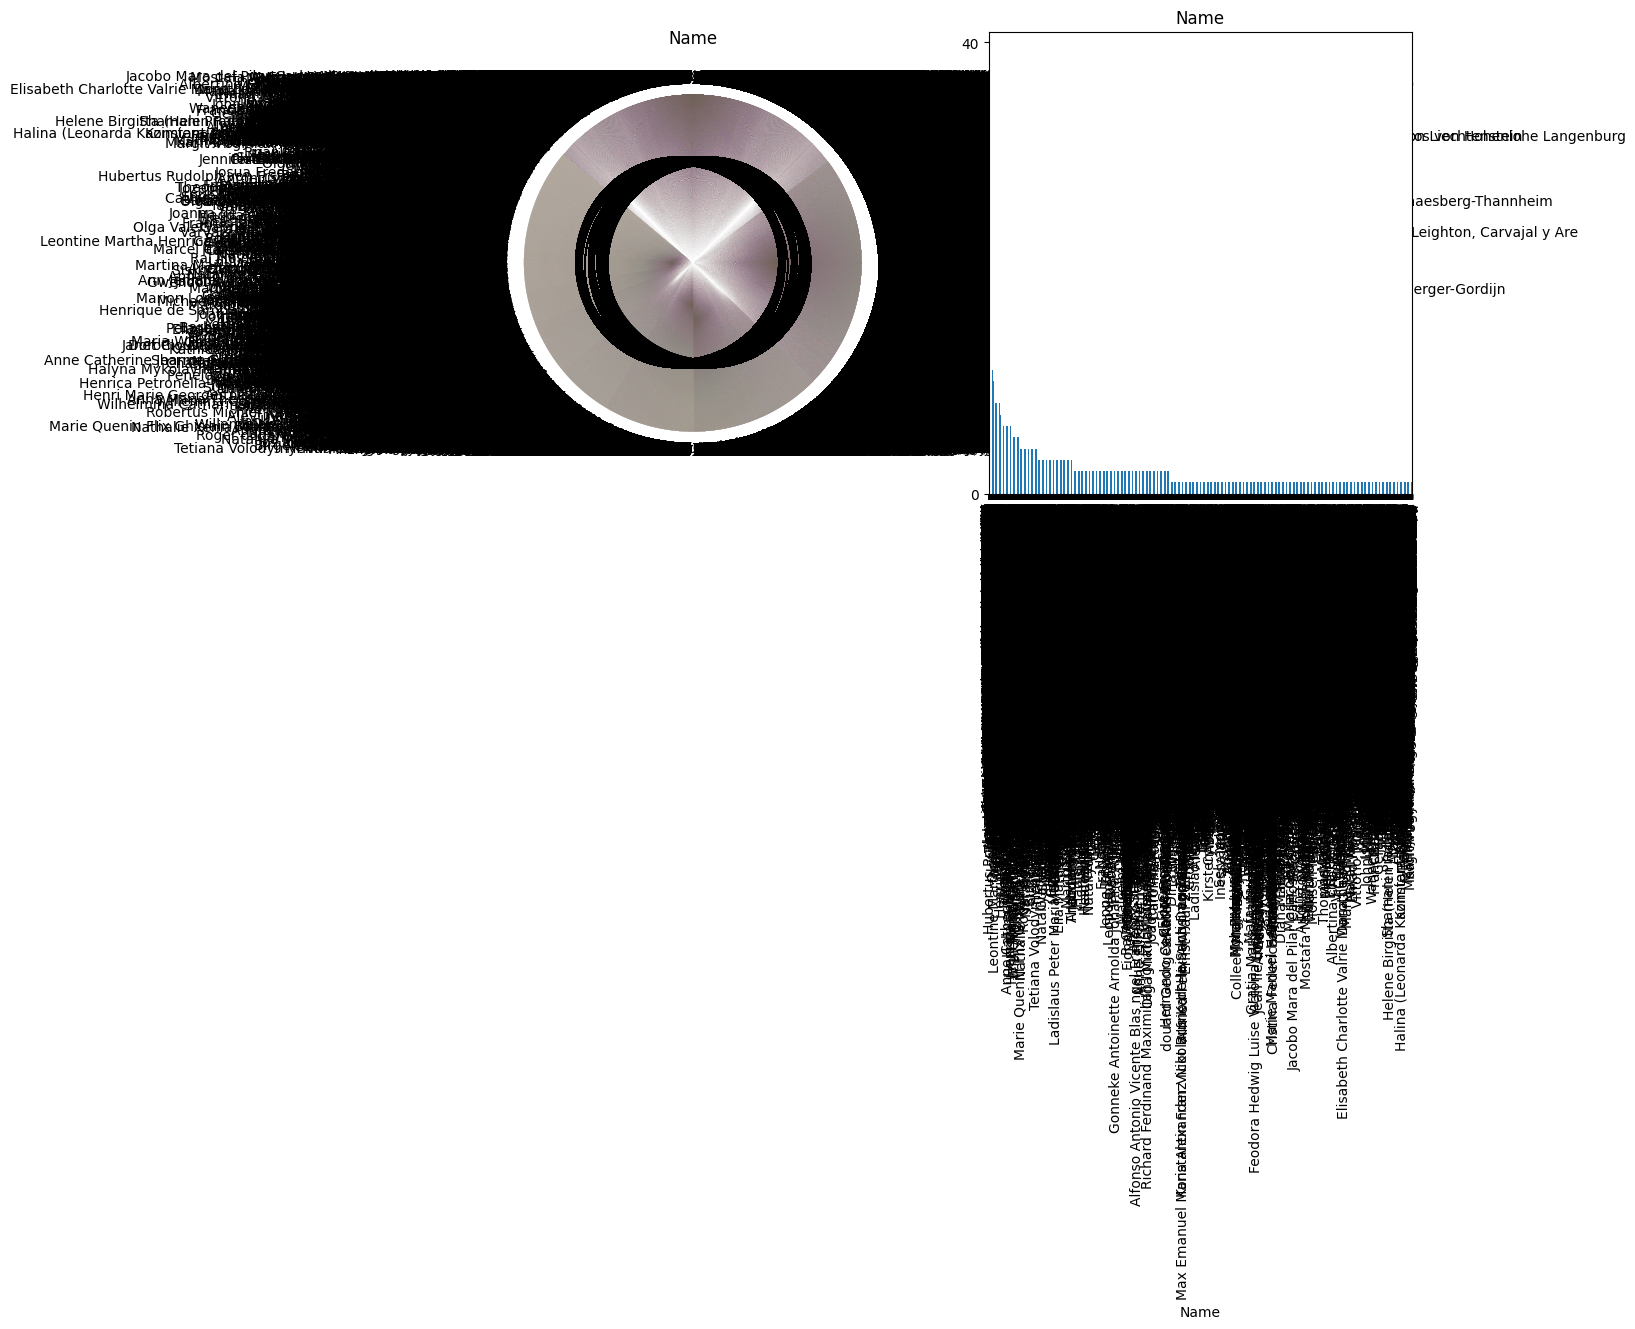

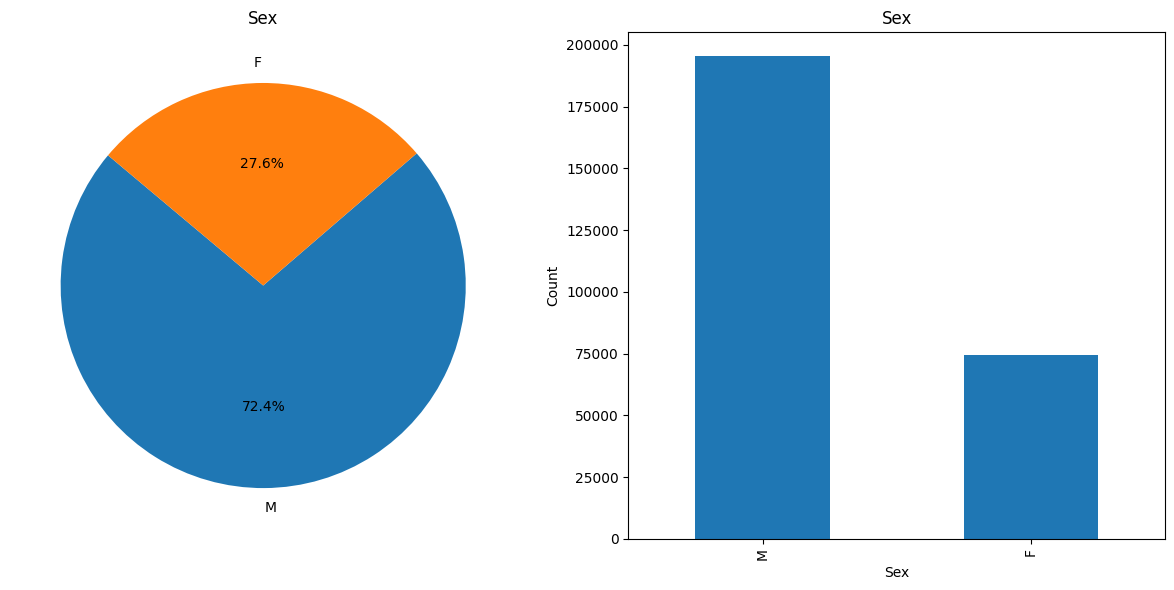

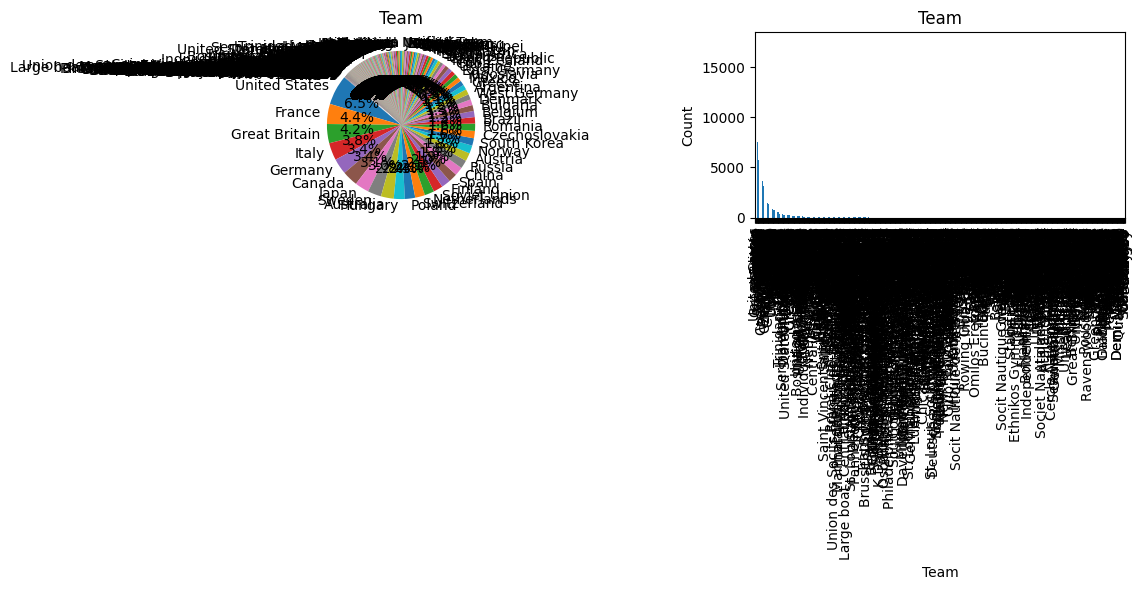

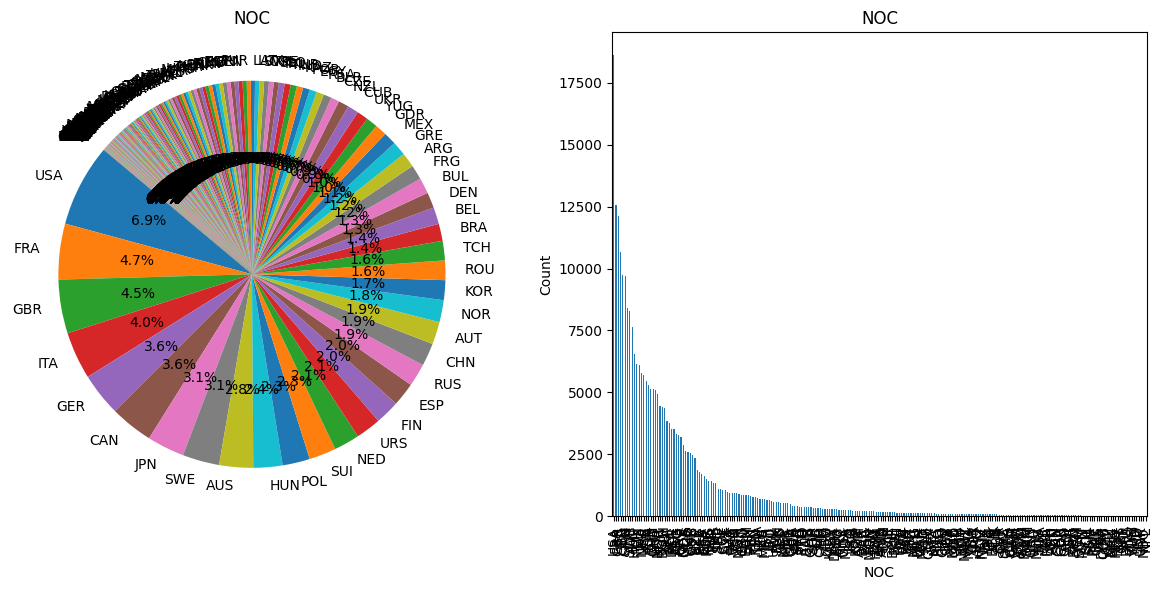

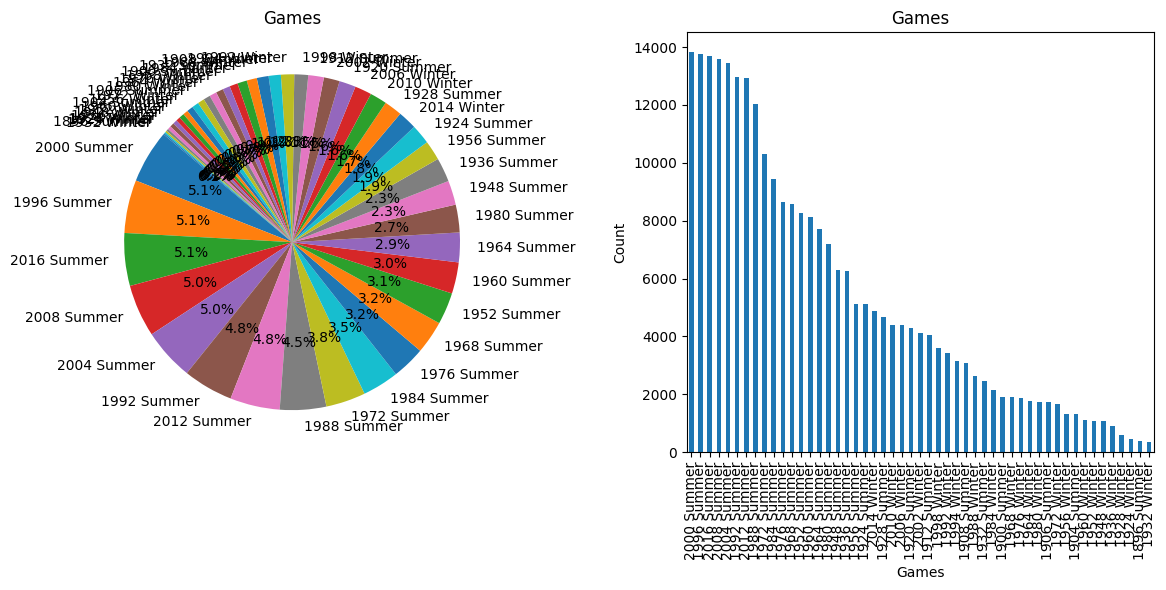

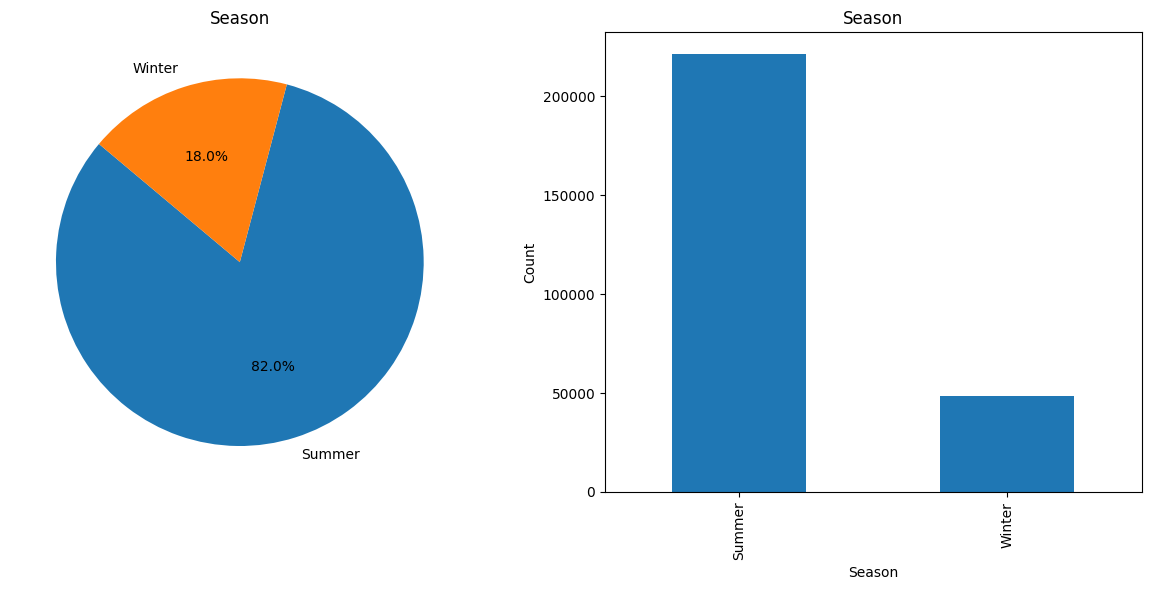

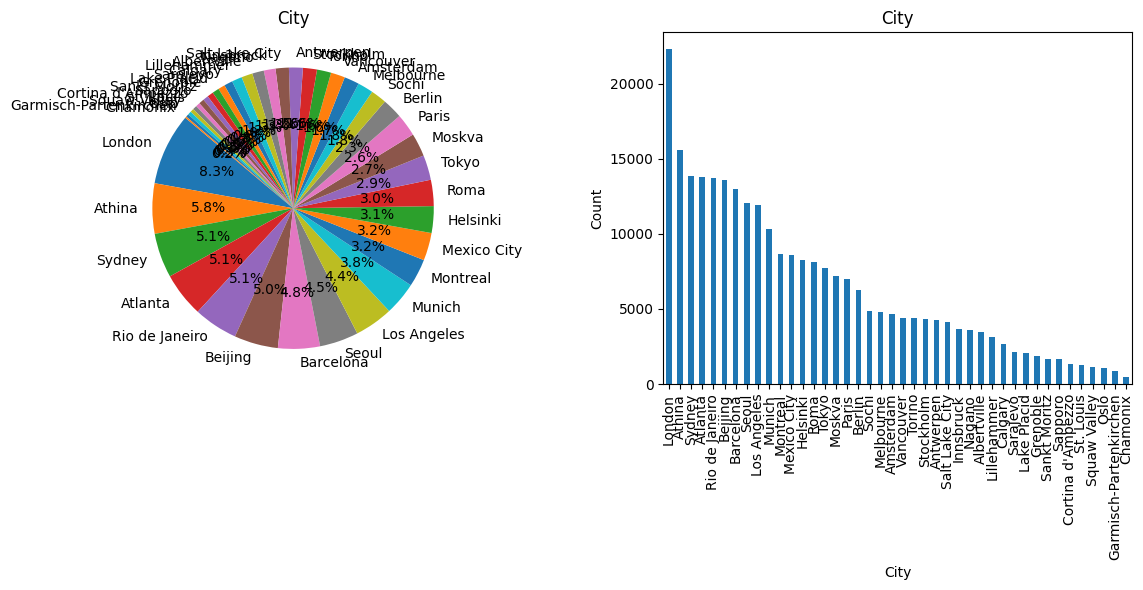

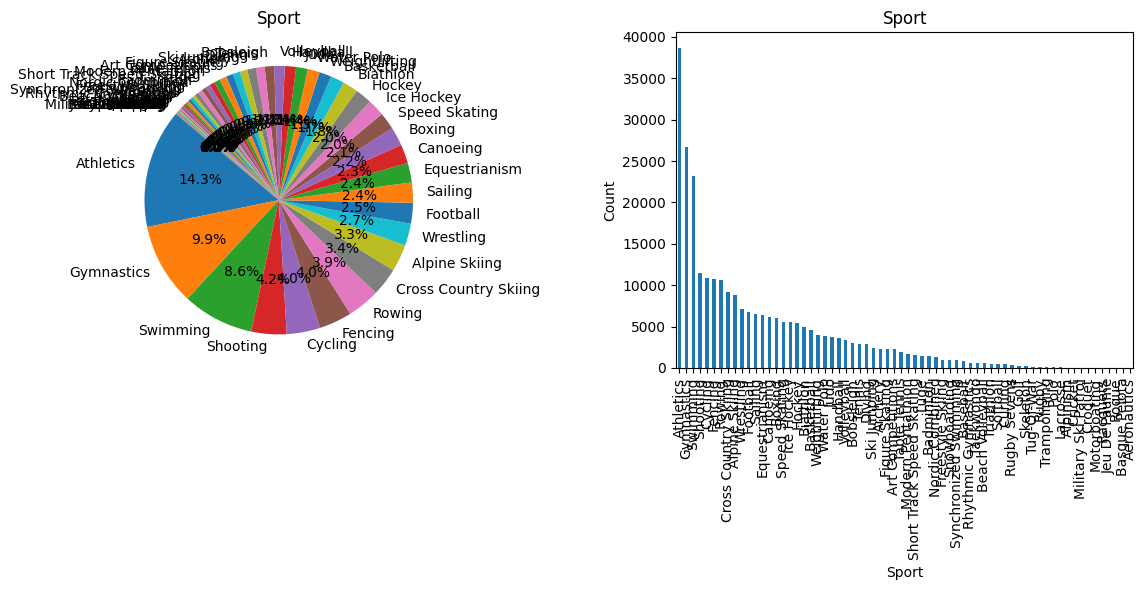

<ipython-input-24-a545adbe1ac3>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


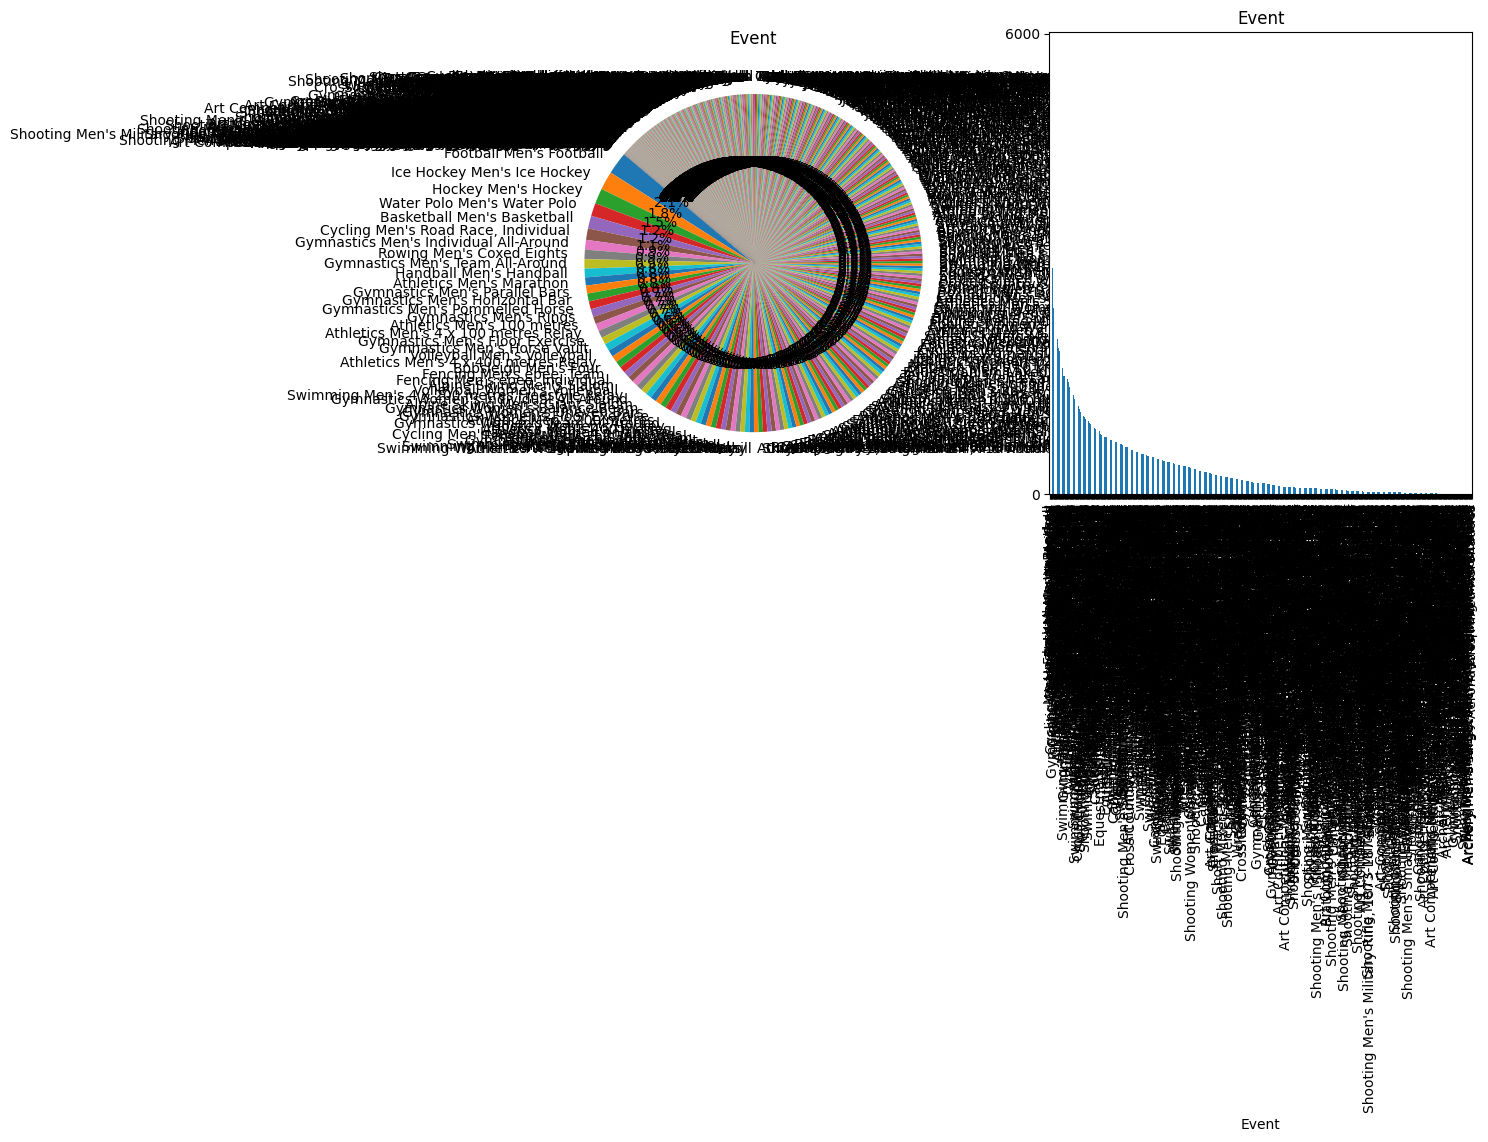

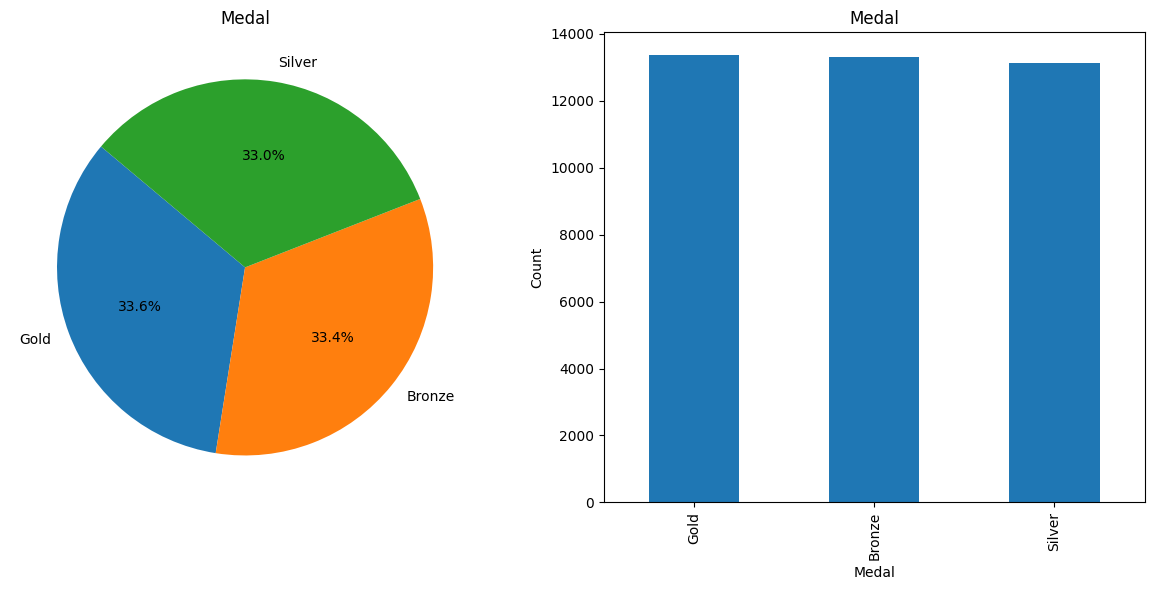

In [24]:
for i in cat_features:
  counts =df1[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

In [21]:
num_features = df1.select_dtypes(include='number')
num_features.columns

Index(['ID', 'Age', 'Height', 'Weight', 'Year'], dtype='object')

In [22]:
num_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Age     260416 non-null  float64
 2   Height  210917 non-null  float64
 3   Weight  208204 non-null  float64
 4   Year    269731 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 12.3 MB


In [23]:
#Find the number of athlete for each year
df1['Year'].value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7383
1936     7146
1956     6434
1924     5570
1928     5238
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1994     3160
1908     3069
1932     2817
1900     1898
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

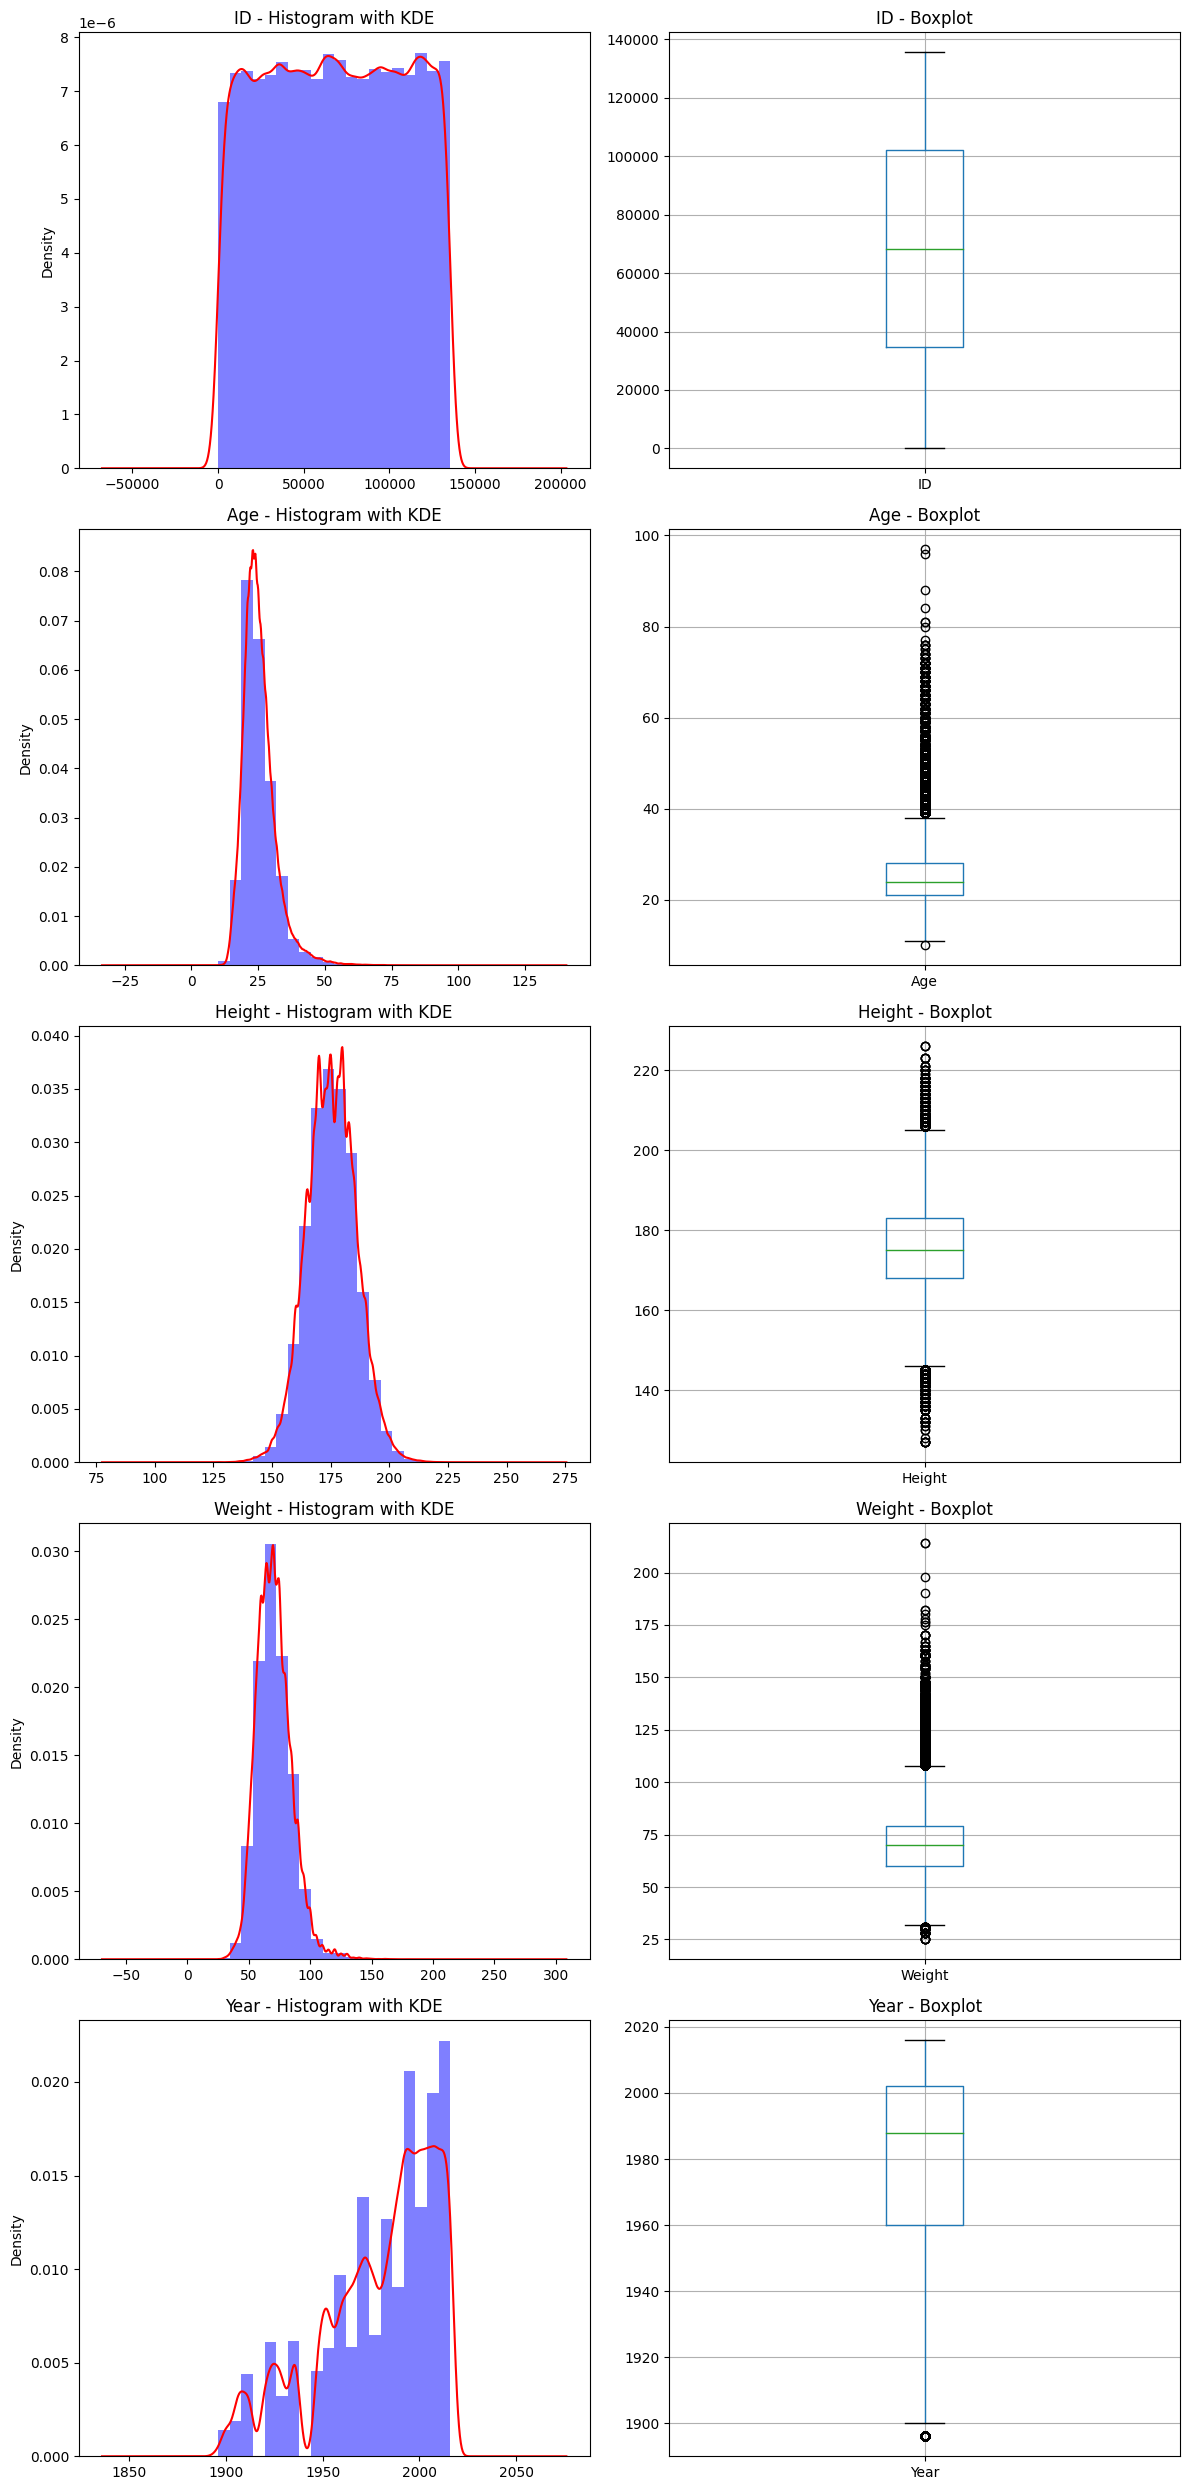

In [26]:
# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(num_features.columns), 2, figsize=(12, 5 * len(num_features.columns)))

for i, col in enumerate(num_features.columns):
    # Histogram with KDE
    num_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    num_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    num_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()


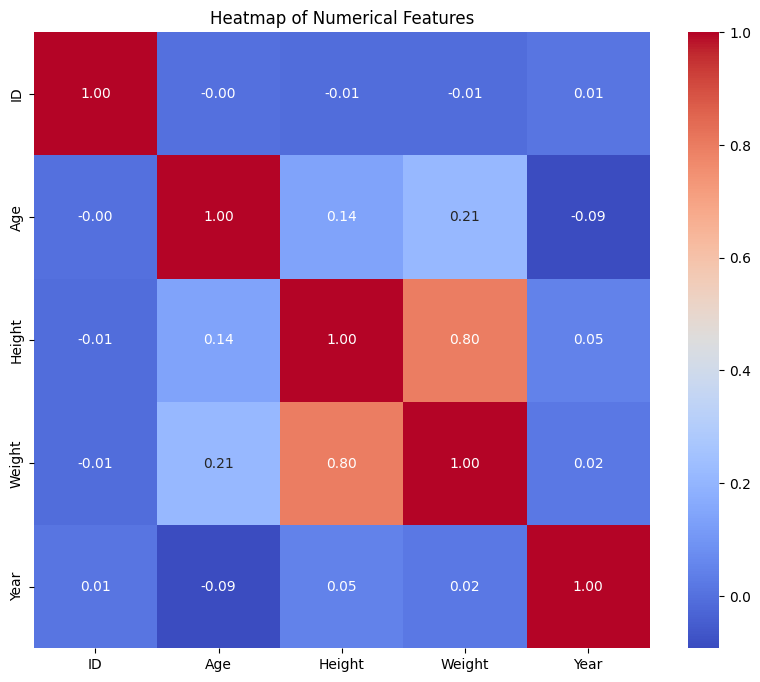

In [27]:
import seaborn as sns
corr = num_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

In [ ]:
#insights :
#from discribe the mean==50% then normal distribution for all numarical values
#duplicated values 1385 are removed
#null values for hight =58,814    weights=61,527    medal=222,959      age =9,315
#all values is 271116 the ratio of missing values of medal is 10.2%
#split data to categorical and numarical values
#categorical values : pie and bar chart
#count values and uniqe 1)sex and season and medal are main categories (2,2,4)
# the max participant  numbers ID    106296  Name           Heikki Ilmari Savolainen
#the year got the max number of Bronze medal is 2008 and 1992 =710
#the year got the max number of Silver medal is 2000 =661
#the year got the max number of gold medal is 2008 =671
#the Max city got Gold medal is London and the min is Garmisch-Partenkirchen
#summer 2000 is the max particepants





